In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable
torch.cuda.is_available()

True

## Load and normalize dataset

In [24]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [25]:
y_train = np.array(train_data["label"])
x_train = np.array(train_data.drop(columns=["label"]))
x_train = x_train / 255.0
x_test = np.array(test_data) / 255.0

0


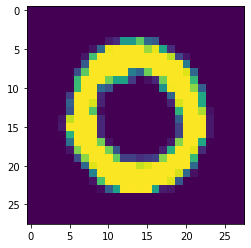

In [26]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1].reshape(28,28))
print(y_train[1])

In [27]:
x_test.shape

(28000, 784)

In [28]:
x_train = x_train.reshape(42000, 28, 28).astype('float32')
x_test = x_test.reshape(28000, 28, 28).astype('float32')

In [29]:
train_images_tensor = torch.tensor(x_train).cuda()
train_labels_tensor = torch.tensor(y_train).cuda()

test_images_tensor = torch.tensor(x_test).cuda()

train_images_tensor = train_images_tensor.view(-1, 1, 28, 28).float()
test_images_tensor = test_images_tensor.view(-1, 1, 28, 28).float()

train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)

In [30]:
train_loader = torch.utils.data.DataLoader(train_tensor, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_images_tensor, batch_size=64, shuffle=False)

In [31]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

## Model

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        hidden1 = 512
        hidden2 = 512
        self.fc1 = nn.Linear(28*28, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 10)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
model = Net()
print(model)
model.to(torch.device("cuda:0"))

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

### Optimizer and loss function

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 10
# valid_loss_min = np.Inf

### Training

In [36]:
train_loss = []

model.train() 
for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item() * data.size(0)

# model.eval() 
# for data, target in valid_loader:
#     output = model(data)
#     loss = criterion(output, target)
#     valid_loss += loss.item() * data.size(0)

train_loss = train_loss / len(train_loader.sampler)
#valid_loss = valid_loss / len(valid_loader.sampler)

print('Epoch: {} \tTraining Loss: {:.6f}'.format(
    epoch + 1,
    train_loss
))

TypeError: 'float' object is not iterable